# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here
data = pd.read_csv("D:/Personal/AppliedAI/5_Performance_metrics/5_a.csv")
data.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
data.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [4]:
#data.describe()
# replacing the values 0 and 1 
data.loc[(data.proba < 0.5),'proba'] = 0
data.loc[(data.proba >= 0.5),'proba'] = 1

In [5]:
data.head()

,y,proba
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [4]:
#confusion matrix TP, TN, FP, FN
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i] != y_pred[i]:
            FP += 1
        if y_pred[i]==0 and y_actual[i] != y_pred[i]:
            FN += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1       

    return(TP, FP, FN, TN)

In [5]:
count = data['y'].count()
print(count)
print(len(data.proba))
TP, FP, TN, FN = perf_measure(data.y, data.proba)
print(TP, FP, TN, FN)
print(" TP:{}\n FP:{}\n FN:{}\n TN:{}".format(TP/count, FP/count, FN/count, TN/count))

10100
10100
10000 100 0 0
 TP:0.9900990099009901
 FP:0.009900990099009901
 FN:0.0
 TN:0.0


In [6]:
#Precision 
TruecountP = 0
for i in range(count):
    if data.proba[i] == 1:
        TruecountP += 1
prec = TP / TruecountP
print(TruecountP)
print(prec)

10100
0.9900990099009901


In [7]:
#Recall 
Truecount = 0
for i in range(count):
    if data.y[i] == 1:
        Truecount += 1
recall = TP / Truecount
print(recall)

1.0


In [8]:
#Harmonic mean
Hm = (2*prec*recall) / (prec + recall)
print(Hm)

0.9950248756218906


In [9]:
#Accuracy Score

accScore = (TP + TN)/ (TP + TN + FP + FN)
print('Accuracy Score :'+str(accScore))

Accuracy Score :0.9900990099009901


In [4]:
#Loading the Data and changing to Descending order by prob values
dataA = pd.read_csv("D:/Personal/AppliedAI/5_Performance_metrics/5_a.csv")
sorted_data=dataA.sort_values(by='proba')
sorted_data.head()

,y,proba
5012,1.0,0.500019
805,1.0,0.500047
7421,1.0,0.500058
1630,1.0,0.500058
8294,1.0,0.500081


In [8]:
dataA.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [7]:
from tqdm import tqdm

def list_tpr_fpr_values(sorted_data):
    list_tpr_fpr =[]
    for threshold in tqdm(sorted_data['proba']):
        y_pred=[]
        for k in sorted_data['proba']:
            if (k < threshold):
                y_pred.append(0.0)
            else:
                y_pred.append(1.0)
        sorted_data['y_pred'] = y_pred
        TP, FP, FN, TN =  perf_measure(sorted_data.y, sorted_data.y_pred)
        TPR = (TP)/(TP+FN)
        FPR = (FP)/(FP+TN)
        list_tpr_fpr.append([TPR,FPR])
    return list_tpr_fpr

In [8]:
def AUCScore(list_tpr_fpr):
    sorted_list_tpr_fpr= sorted(list_tpr_fpr)
    tpr, fpr=[], []

    for i in sorted_list_tpr_fpr:
        tpr.append(i[0])
        fpr.append(i[1])
        
    AUCScore = np.trapz(tpr, fpr)
    return tpr, fpr, AUCScore

In [9]:
list_tpr_fpr=list_tpr_fpr_values(sorted_data)
tpr, fpr, AUCScore=AUCScore(list_tpr_fpr)

print("AUC Score for A: "+str(AUCScore))
#print("Threshold Value: {}{}".format(tpr[0],fpr[0]))


100%|██████████████████████████████████████████████████████████████████████████| 10100/10100 [3:09:59<00:00,  1.13s/it]


AUC Score for A: 0.48829900000000004


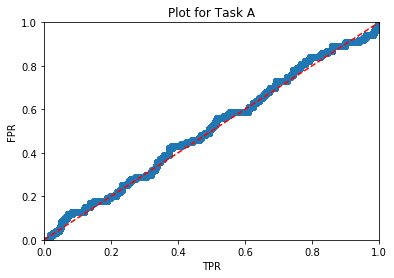

In [27]:
import matplotlib.pyplot as plt

plt.scatter(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('Plot for Task A')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [28]:
# write your code
dataB = pd.read_csv("D:/Personal/AppliedAI/5_Performance_metrics/5_b.csv")
dataB.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [29]:
# replacing the values 0 and 1 
dataB.loc[(dataB.proba < 0.5),'proba'] = 0
dataB.loc[(dataB.proba >= 0.5),'proba'] = 1
dataB.head()

,y,proba
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [30]:
count = dataB['y'].count()
print(count)
TPB, FPB, TNB, FNB = perf_measure(dataB.y, dataB.proba)
print("TP_B:{}\n FP_B:{}\n FN_B:{}\n TN_B:{}".format(TPB/count, FPB/count, FNB/count, TNB/count))

10100
TP_B:0.005445544554455445
 FP_B:0.023663366336633664
 FN_B:0.9664356435643564
 TN_B:0.004455445544554455


In [32]:
#Precision 
TruecountPB = 0
for i in range(count):
    if dataB.proba[i] == 1:
        TruecountPB += 1
precB = TPB / TruecountPB
print(TruecountPB)
print("Precision for B: "+str(precB))

294
Precision for B: 0.1870748299319728


In [33]:
#Recall 
TruecountB = 0
for i in range(count):
    if dataB.y[i] == 1:
        TruecountB += 1
recallB = TPB / TruecountB
print("Recall or B: "+str(recallB))

Recall or B: 0.55


In [34]:
#Harmonic mean
HmB = (2*precB*recallB) / (precB + recallB)
print("armonic mean: "+str(HmB))

armonic mean: 0.2791878172588833


In [35]:
#Accuracy Score
aucScoreB = (TPB + FNB)/ (TPB + TNB + FPB + FNB)
print("Accurecy Score for B:"+str(aucScoreB))

Accurecy Score for B:0.9718811881188119


In [36]:
#Loading the Data and changing to Descending order by prob values
dataB = pd.read_csv("D:/Personal/AppliedAI/5_Performance_metrics/5_b.csv")
sorted_dataB=dataB.sort_values(by='proba')
sorted_dataB.head()


,y,proba
313,0.0,0.100001
1938,0.0,0.100161
1360,0.0,0.100165
2532,0.0,0.100189
8290,0.0,0.100230


In [46]:
list_tpr_fprB = list_tpr_fpr_values(sorted_dataB)
#tprB, fprB, AUCScoreB = AUCScore(list_tpr_fprB)


#print("Threshold Value: {}  {}".format(tprB[0],fprB[0]))

100%|██████████████████████████████████████████████████████████████████████████| 10100/10100 [2:12:02<00:00,  1.27it/s]


In [47]:
sorted_list_tpr_fprB= sorted(list_tpr_fprB)
tprB, fprB=[], []

for i in sorted_list_tpr_fprB:
    tprB.append(i[0])
    fprB.append(i[1])
        
AUCScoreB = np.trapz(tprB, fprB)
print("AUC Score for B: "+str(AUCScoreB))

AUC Score for B: 0.9377570000000001


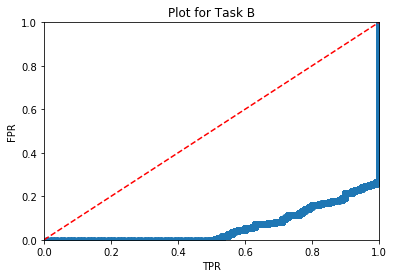

In [49]:
import matplotlib.pyplot as plt

plt.scatter(tprB, fprB)
plt.plot([0,1],[0,1],'r--')
plt.title('Plot for Task B')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [3]:
 # write your code
dataC = pd.read_csv("D:/Personal/AppliedAI/5_Performance_metrics/5_c.csv")
sorted_dataC=dataC.sort_values(by='prob')
sorted_dataC.head()

,y,prob
473,0,0.028038
412,0,0.028396
454,0,0.028964
435,0,0.030269
468,0,0.031114


In [5]:
# replacing the values 0 and 1 
dict_fp_fn ={}
for threshold in sorted_dataC['prob']:
    y_pred=[]
    for k in sorted_dataC['prob']:
        if (k < threshold):
            y_pred.append(0.0)
        else:
            y_pred.append(1.0)
    sorted_dataC['y_pred'] = y_pred
    TP, FP, FN, TN =  perf_measure(sorted_dataC.y, sorted_dataC.y_pred)    
    A = (500*FN) + (100*FP)
    dict_fp_fn.update({threshold:A})

In [6]:
sorted_dict_fp_fn = dict(sorted(dict_fp_fn.items(), key = lambda kv:(kv[1], kv[0]), reverse=False))
print('Best Threshold value is: '+str(list(sorted_dict_fp_fn.keys())[0:1]))

Best Threshold value is: [0.2300390278970873]


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [54]:
dataD = pd.read_csv("D:/Personal/AppliedAI/5_Performance_metrics/5_d.csv");
dataD.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [55]:
#Mean Squared Error
n = dataD['pred'].count()
#print(n)
Y_true= dataD['y']
Y_pred=dataD['pred']
MSE2 = np.square(np.subtract(Y_true,Y_pred)).mean()
#summ/n
print("Mean Squared Error:"+str(MSE2))
    

Mean Squared Error:177.16569974554707


In [57]:
#Mean Absolute Percentage Error
print("Mean Absolute Percentage Error:")
MAPE = np.mean(np.abs(np.subtract(Y_true,Y_pred))/np.mean(Y_true))#*100
print(MAPE)
MMAPE = np.sum(np.abs(np.subtract(Y_true,Y_pred)))/np.sum(Y_true)
print(MMAPE)#*100)
               

Mean Absolute Percentage Error:
0.12912029940096315
0.1291202994009687


In [58]:
import math
def get_r2_python(x_list, y_list):
    #n = len(x)
    x_bar = sum(x_list)/n
    y_bar = sum(y_list)/n
    x_std = math.sqrt(sum([(xi-x_bar)**2 for xi in x_list])/(n-1))
    y_std = math.sqrt(sum([(yi-y_bar)**2 for yi in y_list])/(n-1))
    zx = [(xi-x_bar)/x_std for xi in x_list]
    zy = [(yi-y_bar)/y_std for yi in y_list]
    r = sum(zxi*zyi for zxi, zyi in zip(zx, zy))/(n-1)
    return r**2


In [59]:
print("R^2 error:")
get_r2_python(Y_true,Y_pred)


R^2 error:


0.9563600409879071